# Fraud Detection System using ML algorithms

## Step1- Importing the libraries

In [1]:
import pandas as pd # data processing
from pandas.plotting import scatter_matrix
import numpy as np # working with arrays
import seaborn as sns #visualization
import matplotlib.pyplot as plt # visualization
import itertools # advanced tools


In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Step2- Reading the dataset

## Notes from the dataset 

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

         V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10  ...       V21       V22       V23       V24  \
0  0.098698  0.363787  0.090794  ... -0.018307  0.277838 -0.110474  0.066928   
1  0.085102 -0.255425 -0.166974  ... -0.225775 -0.638672  0.101288 -0.339846   
2  0.247676 -1.514654  0.207643  ...  0.247998  0.771679  0.909412 -0.689281   
3  0.377436 -1.387024 -0.054952  ... -0.108300  0.005274 -0.190321 -1.175575   
4 -0.270533  0.817739  0.753074  ... -0.009431  0.798278 -0.137458  0.141267   

        V25       V26       V27       V28  Amount  Class  
0  0.1285

array([[<AxesSubplot:title={'center':'V1'}>,
        <AxesSubplot:title={'center':'V2'}>,
        <AxesSubplot:title={'center':'V3'}>,
        <AxesSubplot:title={'center':'V4'}>,
        <AxesSubplot:title={'center':'V5'}>],
       [<AxesSubplot:title={'center':'V6'}>,
        <AxesSubplot:title={'center':'V7'}>,
        <AxesSubplot:title={'center':'V8'}>,
        <AxesSubplot:title={'center':'V9'}>,
        <AxesSubplot:title={'center':'V10'}>],
       [<AxesSubplot:title={'center':'V11'}>,
        <AxesSubplot:title={'center':'V12'}>,
        <AxesSubplot:title={'center':'V13'}>,
        <AxesSubplot:title={'center':'V14'}>,
        <AxesSubplot:title={'center':'V15'}>],
       [<AxesSubplot:title={'center':'V16'}>,
        <AxesSubplot:title={'center':'V17'}>,
        <AxesSubplot:title={'center':'V18'}>,
        <AxesSubplot:title={'center':'V19'}>,
        <AxesSubplot:title={'center':'V20'}>],
       [<AxesSubplot:title={'center':'V21'}>,
        <AxesSubplot:title={'center':'V

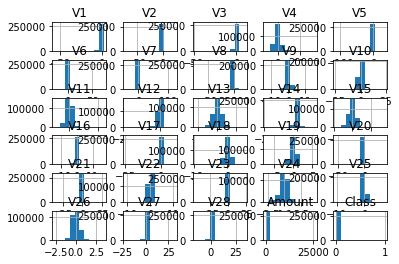

In [3]:

df = pd.read_csv(r'D:\Study\Data Science + Data Analysis\Projects\Fraud Detection System\Dataset\creditcard.csv')

#We are going to neglect the time feature which is of no use to build the models
#The remaining features are the ‘Amount’ feature that contains the total amount of money being transacted and the ‘Class’
#feature that contains whether the transaction is a fraud case or not

df.drop('Time', axis = 1, inplace = True)
print(df.head())
df.hist()
plt.show()

## Step3- Exploratory Data Aanalysis

In [4]:
cases = len(df)
nonfraud_count = len(df[df.Class == 0])
fraud_count = len(df[df.Class == 1])
fraud_percentage = round(fraud_count/nonfraud_count*100, 2)
df.dropna() #dropped NA values if any
#df.shape

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [5]:
print('CASE COUNT\n')
print('Total number of cases are {}'.format(cases))
print('Number of Non-fraud cases are {}'.format(nonfraud_count))
print('Number of Non-fraud cases are {}'.format(fraud_count))
print('Percentage of fraud cases is {}'.format(fraud_percentage))

CASE COUNT

Total number of cases are 284807
Number of Non-fraud cases are 284315
Number of Non-fraud cases are 492
Percentage of fraud cases is 0.17


Here we see that only 17% of 274807 cases are fraudulent
So its clearly a case of unbalanced data
We need to handle this unbalanced data to proceed using our ML models

In [6]:
#Chcking for null values
df.isnull().values.any()

False

[Text(0, 0, 'Not Fraud'), Text(1, 0, 'Fraud')]

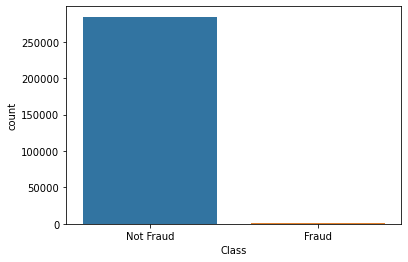

In [7]:
ax = sns.countplot(x="Class", data=df)
ax.set_xticklabels(['Not Fraud','Fraud'])

In [8]:
#Showing the detailed percentages
nonfraud_cases = df[df.Class == 0]
fraud_cases = df[df.Class == 1]

print('CASE AMOUNT STATISTICS')
print('\nNON-FRAUD CASE AMOUNT STATS')
print(nonfraud_cases['Amount'].describe())
print('\nFRAUD CASE AMOUNT STATS')
print(fraud_cases['Amount'].describe())

CASE AMOUNT STATISTICS

NON-FRAUD CASE AMOUNT STATS
count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

FRAUD CASE AMOUNT STATS
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64


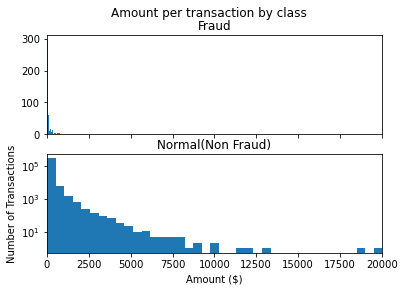

<Figure size 1440x1440 with 0 Axes>

In [9]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')
bins = 50
ax1.hist(fraud_cases.Amount, bins = bins)
ax1.set_title('Fraud')
ax2.hist(nonfraud_cases.Amount, bins = bins)
ax2.set_title("Normal(Non Fraud)")
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.figure(figsize=(20,20))
plt.show();

<Figure size 1440x1440 with 0 Axes>

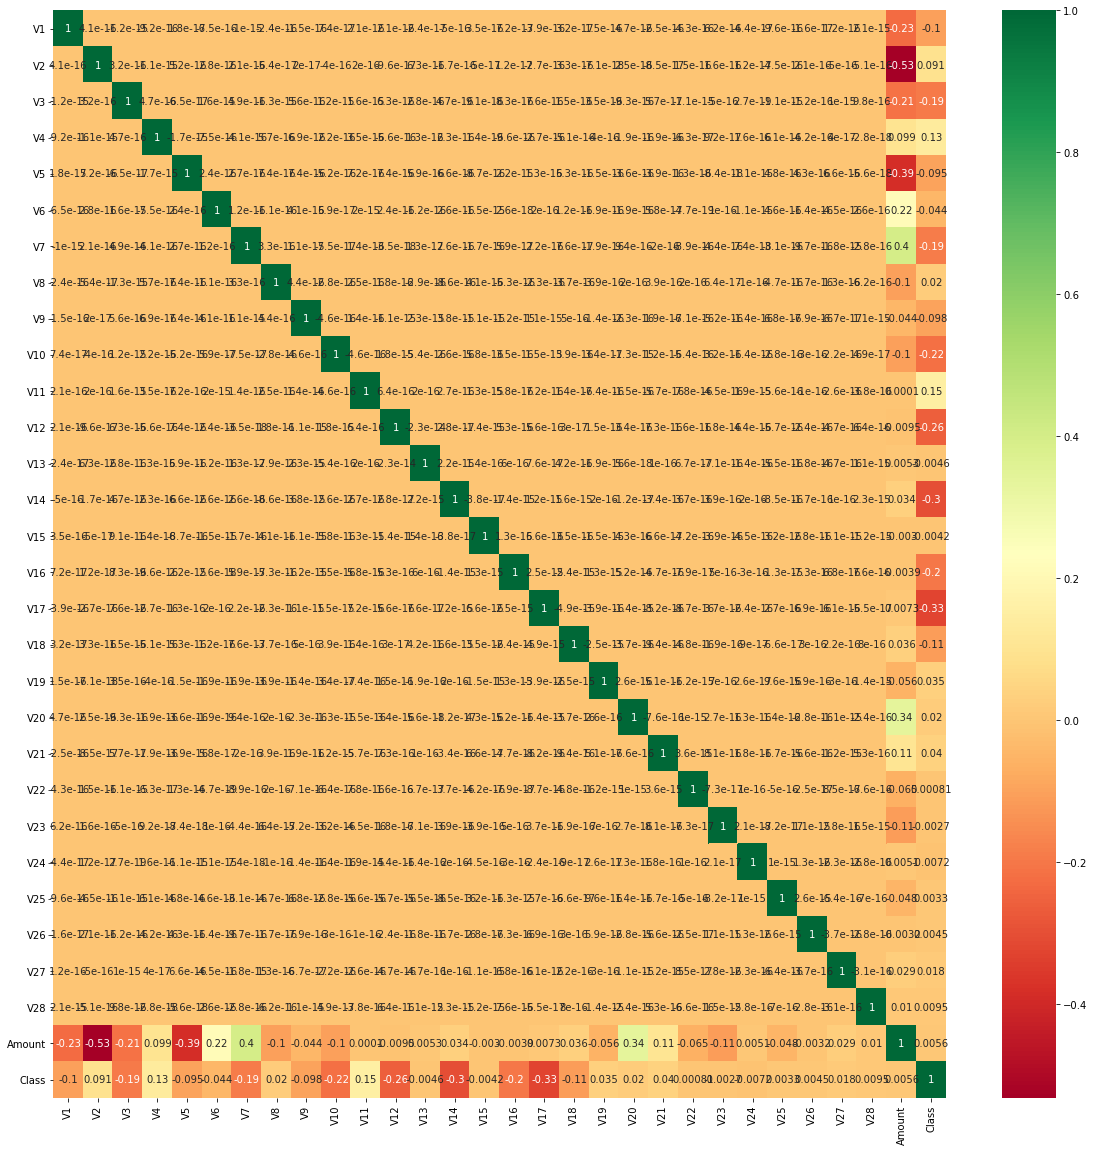

In [10]:
## Correlation
import seaborn as sns
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")


## Feature Scaling : Normalising the data

In [11]:
from sklearn.preprocessing import StandardScaler 
df['Amount'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1, 1))
df['Amount'].head(10)

0    0.244964
1   -0.342475
2    1.160686
3    0.140534
4   -0.073403
5   -0.338556
6   -0.333279
7   -0.190107
8    0.019392
9   -0.338516
Name: Amount, dtype: float64

In [12]:
#Showing the Updated detailed percentages
nonfraud_cases = df[df.Class == 0]
fraud_cases = df[df.Class == 1]

print('CASE AMOUNT STATISTICS')
print('\nNON-FRAUD CASE AMOUNT STATS')
print(nonfraud_cases['Amount'].describe())
print('\nFRAUD CASE AMOUNT STATS')
print(fraud_cases['Amount'].describe())

CASE AMOUNT STATISTICS

NON-FRAUD CASE AMOUNT STATS
count    284315.000000
mean         -0.000234
std           0.999942
min          -0.353229
25%          -0.330640
50%          -0.265271
75%          -0.045177
max         102.362243
Name: Amount, dtype: float64

FRAUD CASE AMOUNT STATS
count    492.000000
mean       0.135382
std        1.026242
min       -0.353229
25%       -0.349231
50%       -0.316247
75%        0.070128
max        8.146182
Name: Amount, dtype: float64


In [13]:
#Create independent and Dependent Features
columns = df.columns.tolist()
# Filter the columns to remove data we do not want 
columns = [c for c in columns if c not in ["Class"]]
# Store the variable we are predicting 
target = "Class"
# Define a random state 
state = np.random.RandomState(42)
X = df[columns]
Y = df[target]
# Print the shapes of X & Y
print(X.shape)
print(Y.shape)

(284807, 29)
(284807,)


In [14]:
X
Y

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.350151
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,-0.254117
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,-0.081839
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.313249


0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64

## Testing the models on the imbalanced data 

In [15]:
# Train-Test split
from sklearn.model_selection import train_test_split 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.5, random_state= 0)
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)

Shape of X_train:  (199364, 29)
Shape of X_test:  (85443, 29)


The models we will test here are: Decision Tree, K-Nearest Neighbors (KNN), Logistic Regression, AdaBoost Classifier, Random Forest, and XGBoost


In [16]:
from sklearn.tree import DecisionTreeClassifier # Decision tree algorithm
from sklearn.neighbors import KNeighborsClassifier # KNN algorithm
from sklearn.linear_model import LogisticRegression # Logistic regression algorithm
from sklearn.ensemble import AdaBoostClassifier # Adaboost algorithm
from sklearn.ensemble import RandomForestClassifier # Random forest tree algorithm
from xgboost import XGBClassifier # XGBoost algorithm
from sklearn.metrics import accuracy_score,f1_score,precision_score, recall_score, roc_auc_score 

## Model 1: Logistic Regression

In [17]:
log_classifier = LogisticRegression()
log_classifier.fit(X_train,Y_train)
y_pred = log_classifier.predict(X_test)
ytrain_pred=log_classifier.predict_proba(X_train)
ytest_pred=log_classifier.predict_proba(X_test)


LogisticRegression()

#### Evaluating the model

In [18]:
#1. Accuracy Score
print('Accuracy score of the Logistic Regression model is {}'.format(accuracy_score(Y_test, y_pred)))
#2. F1 Score
print('F1 score of the Logistic Regression model is {}'.format(f1_score(Y_test, y_pred)))
#3. Precison
print('Precision of the Logistic Regression model is {}'.format(precision_score(Y_test,y_pred)))
#4. Recall
print('Recall of the Logistic Regression model is {}'.format(recall_score(Y_test,y_pred)))
#5. Train ROC_AUC
print('Logistic Train roc-auc: {}'.format(roc_auc_score(Y_train,ytrain_pred[:,:-1])))
#6. Test ROC_AUC
print('Logistic Test roc-auc: {}'.format(roc_auc_score(Y_test,ytest_pred[:,:-1])))


Accuracy score of the Logistic Regression model is 0.999204147794436
F1 score of the Logistic Regression model is 0.728
Precision of the Logistic Regression model is 0.883495145631068
Recall of the Logistic Regression model is 0.6190476190476191
Logistic Train roc-auc: 0.02161229817763376
Logistic Test roc-auc: 0.03103749472026665


## Model 2: Decision Tree Classifier

In [19]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, Y_train)
y_pred2 = clf.predict(X_test)
ytrain_pred2=clf.predict_proba(X_train)
ytest_pred2=clf.predict_proba(X_test)

#### Evaluating the model

In [20]:
#1. Accuracy Score
print('Accuracy score of the Decision Tree Classifier model is {}'.format(accuracy_score(Y_test, y_pred2)))
#2. F1 Score
print('F1 score of the Decision Tree Classifier model is {}'.format(f1_score(Y_test, y_pred2)))
#3. Precison
print('Precision of the Decision Tree Classifier model is {}'.format(precision_score(Y_test,y_pred2)))
#4. Recall
print('Recall of the Decision Tree Classifier model is {}'.format(recall_score(Y_test,y_pred2)))
#5. Train ROC_AUC
print('Decision Tree Classifier Train roc-auc: {}'.format(roc_auc_score(Y_train,ytrain_pred2[:,:-1])))
#6. Test ROC_AUC
print('Decision Tree Classifier Test roc-auc: {}'.format(roc_auc_score(Y_test,ytest_pred2[:,:-1])))

Accuracy score of the Decision Tree Classifier model is 0.9992392589211521
F1 score of the Decision Tree Classifier model is 0.7719298245614036
Precision of the Decision Tree Classifier model is 0.7971014492753623
Recall of the Decision Tree Classifier model is 0.7482993197278912
Decision Tree Classifier Train roc-auc: 0.0
Decision Tree Classifier Test roc-auc: 0.12601447444481448


## Model 3: Adaboost Classification

In [23]:
abc = AdaBoostClassifier(n_estimators=50,learning_rate=1)
abc = abc.fit(X_train, Y_train)
y_pred3 = abc.predict(X_test)
ytrain_pred3=abc.predict_proba(X_train)
ytest_pred3=abc.predict_proba(X_test)

D:\Softwares\Installed\Anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
D:\Softwares\Installed\Anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
D:\Softwares\Installed\Anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


#### Evaluating the model

In [24]:
#1. Accuracy Score
print('Accuracy score of the Adaboost Classification model is {}'.format(accuracy_score(Y_test, y_pred3)))
#2. F1 Score
print('F1 score of the Adaboost Classification model is {}'.format(f1_score(Y_test, y_pred3)))
#3. Precison
print('Precision of the Adaboost Classification model is {}'.format(precision_score(Y_test,y_pred3)))
#4. Recall
print('Recall of the Adaboost Classification model is {}'.format(recall_score(Y_test,y_pred3)))
#5. Train ROC_AUC
print('Adaboost Classifier Train roc-auc: {}'.format(roc_auc_score(Y_train,ytrain_pred3[:,:-1])))
#6. Test ROC_AUC
print('Adaboost Classifier Test roc-auc: {}'.format(roc_auc_score(Y_test,ytest_pred3[:,:-1])))


Accuracy score of the Adaboost Classification model is 0.9991924440855307
F1 score of the Adaboost Classification model is 0.739622641509434
Precision of the Adaboost Classification model is 0.8305084745762712
Recall of the Adaboost Classification model is 0.6666666666666666
Adaboost Classifier Train roc-auc: 0.0012115367908576947
Adaboost Classifier Test roc-auc: 0.02727393011228126


## Model 4: Random Forest Classifier

In [48]:
rf=RandomForestClassifier()
rf.fit(X_train,Y_train)
y_pred4 = clf.predict(X_test)
ytrain_pred4=clf.predict_proba(X_train)
ytest_pred4=clf.predict_proba(X_test)

RandomForestClassifier()

#### Evaluating the model

In [49]:
#1. Accuracy Score
print('Accuracy score of the Random Forest Classifier model is {}'.format(accuracy_score(Y_test, y_pred4)))
#2. F1 Score
print('F1 score of the Random Forest Classifier model is {}'.format(f1_score(Y_test, y_pred4)))
#3. Precison
print('Precision of the Random Forest Classifier model is {}'.format(precision_score(Y_test,y_pred4)))
#4. Recall
print('Recall of the Random Forest Classifier model is {}'.format(recall_score(Y_test,y_pred4)))
#5. Train ROC_AUC
print('Random Forest Classifier Train roc-auc: {}'.format(roc_auc_score(Y_train,ytrain_pred4[:,:-1])))
#6. Test ROC_AUC
print('Random Forest Classifier Test roc-auc: {}'.format(roc_auc_score(Y_test,ytest_pred4[:,:-1])))



Accuracy score of the Random Forest Classifier model is 0.9991105181231933
F1 score of the Random Forest Classifier model is 0.7934782608695651
Precision of the Random Forest Classifier model is 0.6606334841628959
Recall of the Random Forest Classifier model is 0.9931972789115646
Random Forest Classifier Train roc-auc: 0.00040448399399051205
Random Forest Classifier Test roc-auc: 0.0038410060141107444


## Model 5: XG Boost Classifier 

In [46]:
xgb = XGBClassifier(max_depth = 4)
xgb.fit(X_train, Y_train)
y_pred5 = xgb.predict(X_test)
ytrain_pred5=xgb.predict_proba(X_train)
ytest_pred5=xgb.predict_proba(X_test)

D:\Softwares\Installed\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:46:05] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=16, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

#### Evaluating the model

In [47]:
#1. Accuracy Score
print('Accuracy score of the XG Boost Classifier model is {}'.format(accuracy_score(Y_test, y_pred5)))
#2. F1 Score
print('F1 score of the XG Boost Classifier model is {}'.format(f1_score(Y_test, y_pred5)))
#3. Precison
print('Precision of the XG Boost Classifier model is {}'.format(precision_score(Y_test,y_pred5)))
#4. Recall
print('Recall of the XG Boost Classifier model is {}'.format(recall_score(Y_test,y_pred5)))
#5. Train ROC_AUC
print('XG Boost Classifier Train roc-auc: {}'.format(roc_auc_score(Y_train,ytrain_pred5[:,:-1])))
#6. Test ROC_AUC
print('XG Boost Classifier Test roc-auc: {}'.format(roc_auc_score(Y_test,ytest_pred5[:,:-1])))



Accuracy score of the XG Boost Classifier model is 0.9995201479348805
F1 score of the XG Boost Classifier model is 0.8475836431226766
Precision of the XG Boost Classifier model is 0.9344262295081968
Recall of the XG Boost Classifier model is 0.7755102040816326
XG Boost Classifier Train roc-auc: 0.0
XG Boost Classifier Test roc-auc: 0.02875731984784159


We saw how the selected ML algorithms perfrom with the unbalanced data. The performance is yet to increase after we perform SMOTETomek to generate new examples that are synthesized from the existing minority class(Fraud Cases)

## Handling Imbalanced Data 


## SMOTE Tomek Technique

In [29]:
# Separate class
Non_fraud = df[df['Class'] == 0]
Fraud = df[df['Class'] == 1]  # print the shape of the class
print('class 0 = Non_fraud:', Non_fraud.shape)
print('class 1 = Fraud:', Fraud.shape)


class 0 = Non_fraud: (284315, 30)
class 1 = Fraud: (492, 30)


In [30]:
from imblearn.over_sampling import SMOTE
from collections import Counter
X_resampled, Y_resampled = SMOTE().fit_resample(X, Y)
print("Resampled shape of X: ", X_resampled.shape)
print("Resampled shape of Y: ", Y_resampled.shape)
value_counts = Counter(Y_resampled)
print(value_counts)
train_X, test_X, train_Y, test_Y = train_test_split(X_resampled, Y_resampled, test_size= 0.3, random_state= 42)

Resampled shape of X:  (568630, 29)
Resampled shape of Y:  (568630,)
Counter({0: 284315, 1: 284315})


We find a balanced distribution of data after SMOTE Tomek operation. 
Applying the ML algorithms once again

## Testing the models on the balanced data 

## Model 1: Logistic Regression 

In [31]:
log_classifier = LogisticRegression()
log_classifier.fit(train_X,train_Y)
y_pred = log_classifier.predict(test_X)
ytrain_pred=log_classifier.predict_proba(train_X)
ytest_pred=log_classifier.predict_proba(test_X)

LogisticRegression()

#### Evaluating the model

In [32]:
#1. Accuracy Score
print('Accuracy score of the Logistic Regression model is {}'.format(accuracy_score(test_Y, y_pred)))
#2. F1 Score
print('F1 score of the Logistic Regression model is {}'.format(f1_score(test_Y, y_pred)))
#3. Precison
print('Precision of the Logistic Regression model is {}'.format(precision_score(test_Y,y_pred)))
#4. Recall
print('Recall of the Logistic Regression model is {}'.format(recall_score(test_Y,y_pred)))
#5. Train ROC_AUC
print('Logistic Train roc-auc: {}'.format(roc_auc_score(train_Y,ytrain_pred[:,:-1])))
#6. Test ROC_AUC
print('Logistic Test roc-auc: {}'.format(roc_auc_score(test_Y,ytest_pred[:,:-1])))

Accuracy score of the Logistic Regression model is 0.9461161036174666
F1 score of the Logistic Regression model is 0.9446251716908841
Precision of the Logistic Regression model is 0.973260837181588
Recall of the Logistic Regression model is 0.917626404494382
Logistic Train roc-auc: 0.0109884044372008
Logistic Test roc-auc: 0.011284695693488691


## Model 2: Decision Tree Classifier 

In [33]:
clf = DecisionTreeClassifier()
clf = clf.fit(train_X, train_Y)
y_pred2 = clf.predict(test_X)
ytrain_pred2=clf.predict_proba(train_X)
ytest_pred2=clf.predict_proba(test_X)

#### Evaluating the model

In [34]:
#1. Accuracy Score
print('Accuracy score of the Decision Tree Classifier model is {}'.format(accuracy_score(test_Y, y_pred2)))
#2. F1 Score
print('F1 score of the Decision Tree Classifier model is {}'.format(f1_score(test_Y, y_pred2)))
#3. Precison
print('Precision of the Decision Tree Classifier model is {}'.format(precision_score(test_Y,y_pred2)))
#4. Recall
print('Recall of the Decision Tree Classifier model is {}'.format(recall_score(test_Y,y_pred2)))
#5. Train ROC_AUC
print('Decision Tree Classifier Train roc-auc: {}'.format(roc_auc_score(train_Y,ytrain_pred2[:,:-1])))
#6. Test ROC_AUC
print('Decision Tree Classifier Test roc-auc: {}'.format(roc_auc_score(test_Y,ytest_pred2[:,:-1])))

Accuracy score of the Decision Tree Classifier model is 0.9980420777424102
F1 score of the Decision Tree Classifier model is 0.9980469892058146
Precision of the Decision Tree Classifier model is 0.9972422818948795
Recall of the Decision Tree Classifier model is 0.9988529962546816
Decision Tree Classifier Train roc-auc: 0.0
Decision Tree Classifier Test roc-auc: 0.001959307930275799


## Model 3: Adaboost Classification

In [35]:
abc = AdaBoostClassifier(n_estimators=50,learning_rate=1)
abc = abc.fit(train_X, train_Y)
y_pred3 = abc.predict(test_X)
ytrain_pred3=abc.predict_proba(train_X)
ytest_pred3=abc.predict_proba(test_X)

D:\Softwares\Installed\Anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
D:\Softwares\Installed\Anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
D:\Softwares\Installed\Anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


#### Evaluating the model 

In [36]:
#1. Accuracy Score
print('Accuracy score of the Adaboost Classification model is {}'.format(accuracy_score(test_Y, y_pred3)))
#2. F1 Score
print('F1 score of the Adaboost Classification model is {}'.format(f1_score(test_Y, y_pred3)))
#3. Precison
print('Precision of the Adaboost Classification model is {}'.format(precision_score(test_Y,y_pred3)))
#4. Recall
print('Recall of the Adaboost Classification model is {}'.format(recall_score(test_Y,y_pred3)))
#5. Train ROC_AUC
print('Adaboost Classifier Train roc-auc: {}'.format(roc_auc_score(train_Y,ytrain_pred3[:,:-1])))
#6. Test ROC_AUC
print('Adaboost Classifier Test roc-auc: {}'.format(roc_auc_score(test_Y,ytest_pred3[:,:-1])))


Accuracy score of the Adaboost Classification model is 0.9618556882331217
F1 score of the Adaboost Classification model is 0.9614872423160923
Precision of the Adaboost Classification model is 0.9725564855059449
Recall of the Adaboost Classification model is 0.9506671348314607
Adaboost Classifier Train roc-auc: 0.004776874399684774
Adaboost Classifier Test roc-auc: 0.004910769876272838


## Model 4: Random Forest Classifier 

In [37]:
rf=RandomForestClassifier()
rf.fit(train_X,train_Y)
y_pred4 = clf.predict(test_X)
ytrain_pred4=clf.predict_proba(train_X)
ytest_pred4=clf.predict_proba(test_X)

RandomForestClassifier()

#### Evaluating the model 

In [41]:
#1. Accuracy Score
print('Accuracy score of the Random Forest Classifier model is {}'.format(accuracy_score(test_Y, y_pred4)))
#2. F1 Score
print('F1 score of the Random Forest Classifier model is {}'.format(f1_score(test_Y, y_pred4)))
#3. Precison
print('Precision of the Random Forest Classifier model is {}'.format(precision_score(test_Y,y_pred4)))
#4. Recall
print('Recall of the Random Forest Classifier model is {}'.format(recall_score(test_Y,y_pred4)))
#5. Train ROC_AUC
print('Random Forest Train roc-auc: {}'.format(roc_auc_score(train_Y,ytrain_pred4[:,:-1])))
#6. Test ROC_AUC
print('Random Forest Test roc-auc: {}'.format(roc_auc_score(test_Y,ytest_pred4[:,:-1])))


Accuracy score of the Random Forest Classifier model is 0.9980420777424102
F1 score of the Random Forest Classifier model is 0.9980469892058146
Precision of the Random Forest Classifier model is 0.9972422818948795
Recall of the Random Forest Classifier model is 0.9988529962546816
Random Forest Train roc-auc: 0.0
Random Forest Test roc-auc: 0.001959307930275799


## Model 5: XG Boost Classifier 

In [39]:
xgb = XGBClassifier(max_depth = 4)
xgb.fit(train_X, train_Y)
y_pred5 = xgb.predict(test_X)
ytrain_pred5=xgb.predict_proba(train_X)
ytest_pred5=xgb.predict_proba(test_X)

D:\Softwares\Installed\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:40:08] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=16, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

####  Evaluating the model

In [42]:
#1. Accuracy Score
print('Accuracy score of the XG Boost Classifier model is {}'.format(accuracy_score(test_Y, y_pred5)))
#2. F1 Score
print('F1 score of the XG Boost Classifier model is {}'.format(f1_score(test_Y, y_pred5)))
#3. Precison
print('Precision of the XG Boost Classifier model is {}'.format(precision_score(test_Y,y_pred5)))
#4. Recall
print('Recall of the XG Boost Classifier model is {}'.format(recall_score(test_Y,y_pred5)))
#5. Train ROC_AUC
print('XG Boost Classifier Train roc-auc: {}'.format(roc_auc_score(train_Y,ytrain_pred5[:,:-1])))
#6. Test ROC_AUC
print('XG Boost Classifier Test roc-auc: {}'.format(roc_auc_score(test_Y,ytest_pred5[:,:-1])))


Accuracy score of the XG Boost Classifier model is 0.9987513849075849
F1 score of the XG Boost Classifier model is 0.9987549174913634
Precision of the XG Boost Classifier model is 0.9976294185652728
Recall of the XG Boost Classifier model is 0.9998829588014981
XG Boost Classifier Train roc-auc: 1.9605778724562792e-05
XG Boost Classifier Test roc-auc: 4.6566999341922895e-05


## Conclusions 

1. The dataset was cleaned and the features were removed using PCA from the beginning because of the confidentiality reasons. This made woking on the model a bit difficult as the features were unknown.

2. The data is very unbalanced and all the models that were run using the dataset showed results which indicated overfitting.

3. I used SMOTE Tomek method to resample the dataset and made it balanced.

4. The models I worked on are Decision Tree, K-Nearest Neighbors (KNN), Logistic Regression, AdaBoost Classifier, Random Forest, and XGBoost

5. The best model was XGBoost classifier showing the best accuracy and F1 score in the balanced dataset.

6. The biggest problem is faced was while implementing SVM in the dataset. SVM took very long time to compute making it an unreasonable alternative for an ML model. I tried using differnt kernels within SVM (Linear and RBF ) but both took very long time to compute the results when the dataset was balanced. 